The goal of this project is to explore and aim at understanding the basic steps in an image classification problem using Neural Networks. We use the VGG16 model to try and understand the classification problem. 

coding references for this project : 

https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras/notebook

https://www.youtube.com/watch?v=LKMi8Daf2ts&list=TLPQMTYwNDIwMjLSZInzX0B25w&index=5&ab_channel=Simplilearn

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/


In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sns; sns.set(font_scale = 1.4)
import matplotlib.pyplot as plt
import cv2 # used for importing  and modifying images
from sklearn.utils import shuffle
import tensorflow as tf
from tqdm import tqdm # extensible progress bar for python. Mainly used for visual effects.

In [2]:
# settings up classes and image details

classes = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

class_labels = {class_name:i for i, class_name in enumerate(classes)}

num_classes = len(classes)

print(class_labels)

IMAGE_SIZE = (150,150)


{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [3]:
directory = '../Capstone 4 - Image classification-Intel'
import os
os.listdir(directory) # lists the folders within that the directory

['.DS_Store',
 'Intel_Image_Classification.ipynb',
 'seg_test',
 'seg_train',
 'seg_pred',
 '.ipynb_checkpoints',
 'archive.zip']

In [4]:
def load_data():
    categories = ['seg_train', 'seg_test']
    output = []
    for category in categories:
      path = os.path.join(directory, category)
      print(path)

      images = []
      labels = []
      print('Loading {}'.format(category))

    # iterating through each folder under the train and test folders
      for f in os.listdir(path):
        if f.startswith('.'):
          continue
        else:
          label = class_labels[f] # getting the label names for the categories

        # iterating through the image in each folder
          for file in os.listdir(os.path.join(path, f)):

             # getting the path name of the image file
            img_path = os.path.join(os.path.join(path,f), file)

            # reading and resizing the image
            image = cv2.imread(img_path)
           # because CV2 reads images in BGR format they need to converted 
           # to RGB format which is quite common
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)

          # Appending image and its label to the output
            images.append(image)
            labels.append(label)

      images = np.array(images, dtype = 'float32')
      labels = np.array(labels, dtype = 'int32')

      output.append((images, labels))

    return output













In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

../Capstone 4 - Image classification-Intel/seg_train
Loading seg_train
../Capstone 4 - Image classification-Intel/seg_test
Loading seg_test


In [6]:
test_labels

array([5, 5, 5, ..., 4, 4, 4], dtype=int32)

In [7]:
shuffle(test_labels)

array([0, 2, 0, ..., 3, 1, 0], dtype=int32)

In [8]:
test_labels

array([5, 5, 5, ..., 4, 4, 4], dtype=int32)

In [9]:
train_images, train_labels = shuffle(train_images, train_labels, random_state = 25)

In [10]:
# function to display images

def disp_im(class_names, images, labels) :
  """ Displaying images along with labels """

  fig_size = (20,20)
  fig = plt.figure(figsize = fig_size)
  fig.suptitle("Some sample images", fontsize = 16)

  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #image = cv2.resize(images[i], fig_size)
    plt.imshow(images[i].astype(np.uint8))#, cmap = plt.cm.binary)
    plt.xlabel(class_names[labels[i]], fontsize = 15)

  plt.show()



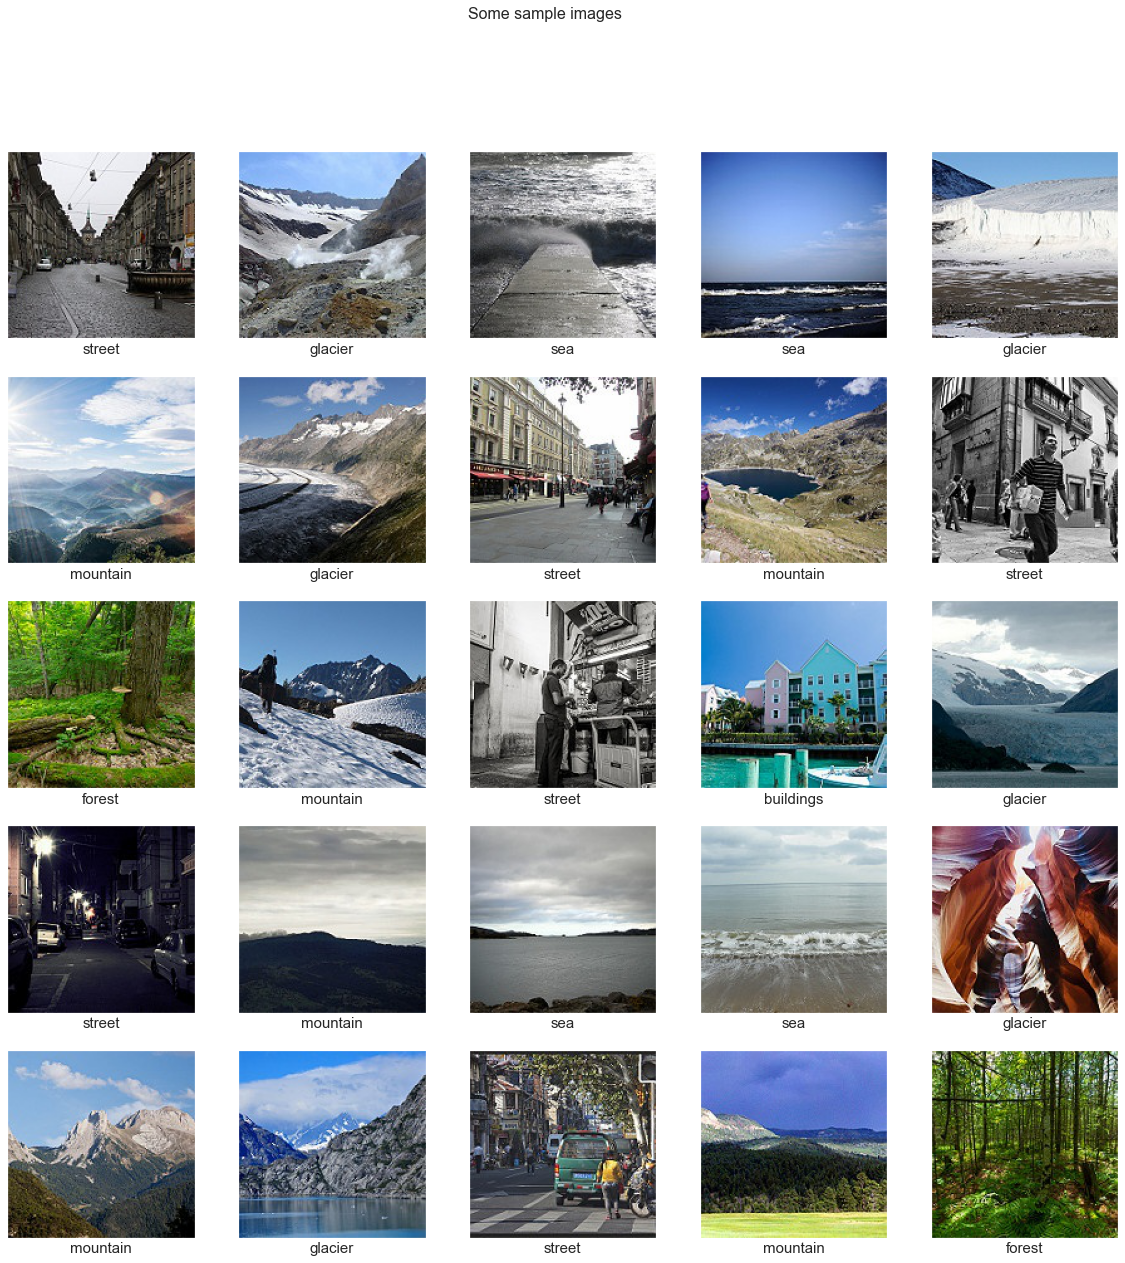

In [11]:
disp_im(classes, train_images, train_labels)

Explaing the Neural Networks created below : 

32, (3,3) - Used to create filters to extract features. Here 32 filters of size 3,3 are used.

Max pooling 2D - The image gets down sized to only store the critical information.

Flatten - Transforms the image from a 2D to a 1D array of 150, 150, 3 pixel values.

Relu - Activation finction that returns a value max(x, 0) for the input value x

Softmax - Has 6 neuron one for each output label

In [12]:
# start the CNN part here
# 32,(3,3) - How many CNN are being set up , (3,3) - Size of the window moving over the image
# 150, 150, 3 - Based on fig size - 3 - For RGB
# 
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2), 
        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(6, activation = 'softmax')
])

2022-05-05 00:13:09.991713: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, batch_size = 128, epochs = 4, validation_split = 0.2)

Epoch 1/4
88/88 [==============================] - 94s 1s/step - loss: 90.1368 - accuracy: 0.3011 - val_loss: 1.6804 - val_accuracy: 0.3456
Epoch 2/4
88/88 [==============================] - 94s 1s/step - loss: 1.4402 - accuracy: 0.4500 - val_loss: 1.5442 - val_accuracy: 0.4079
Epoch 3/4
88/88 [==============================] - 96s 1s/step - loss: 1.0186 - accuracy: 0.6274 - val_loss: 1.6461 - val_accuracy: 0.4414
Epoch 4/4
88/88 [==============================] - 97s 1s/step - loss: 0.6593 - accuracy: 0.7587 - val_loss: 1.8559 - val_accuracy: 0.4578


In [15]:
def plot_accuracy(history):
  """ Plot accuracy and loss during training """

  # plot accuracy
  fig = plt.figure(figsize = (10, 5))
  plt.subplot(221)
  plt.plot(history.history['accuracy'], 'bo--', label = "acc")
  plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
  plt.title("Train_accuracy vs val_accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  # plot loss function

  plt.subplot(222)
  plt.plot(history.history['loss'], 'bo--', label = "loss")
  plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
  plt.title("Train_loss vs val_loss")
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.show()


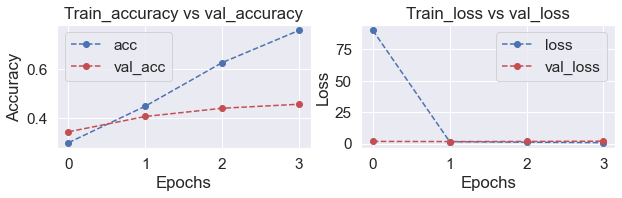

In [16]:
plot_accuracy(history)

In [17]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 7s 69ms/step - loss: 1.8186 - accuracy: 0.4477


In [18]:
predictions = model.predict(test_images)

In [19]:
len(predictions)

3000

In [20]:
predictions[700:703]

array([[2.9329831e-05, 2.0448511e-02, 2.4170184e-09, 9.7917181e-01,
        3.2941322e-04, 2.0944020e-05],
       [1.5102157e-03, 8.8350580e-06, 1.9376681e-04, 9.9580377e-01,
        2.4833723e-03, 8.1877303e-08],
       [9.8786213e-02, 3.6817745e-04, 2.2114119e-02, 8.7717897e-01,
        1.5508909e-03, 1.6144792e-06]], dtype=float32)

In [21]:
pred_labels = np.argmax(predictions, axis = 1)
print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.38      0.39      0.38       525
           1       0.49      0.55      0.52       501
           2       0.38      0.53      0.44       553
           3       0.38      0.38      0.38       437
           4       0.30      0.17      0.22       510
           5       0.78      0.67      0.72       474

    accuracy                           0.45      3000
   macro avg       0.45      0.45      0.44      3000
weighted avg       0.45      0.45      0.44      3000



The accuracy is 55% . Whether tht value is good or bad depends on the domain you're in. If this classification is for detecting some kind of cancer, then 44% is not a good value. However if the this for in image classification to recognize a person, it may be acceptable.

In [22]:
# displaying a specific image
def disp_one_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index].astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image # {} : '.format(index) + classes[labels[index]])
    
    plt.show()

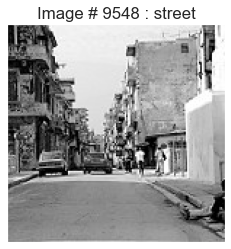

In [23]:
disp_one_image(classes, train_images, train_labels)

### Incorrect prediction analysis 

In [24]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels, pred_labels)
conf_mat

array([[203,  36, 170,  52,  58,   6],
       [ 26, 277,  34,  95,  17,  52],
       [107,  37, 291,  41,  71,   6],
       [ 55,  95,  50, 164,  54,  19],
       [127,  55, 192,  42,  89,   5],
       [ 23,  69,  25,  33,   5, 319]])

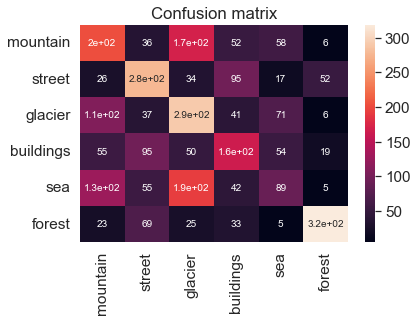

In [25]:
# plotting the confusion matrix as a heatmap
ax = plt.axes()
sns.heatmap(conf_mat, annot = True,
           annot_kws = {"size" : 10}, 
           xticklabels = classes, 
           yticklabels = classes, 
           ax = ax)
ax.set_title("Confusion matrix")
plt.show()

Looking at the heatmap above we can see that a good chunk of mountains have been classified as glaciers, streets as buildings, glaciers as mountains, sea as mountains and glaciers. 

In [26]:
# Using the VGG16 model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

Note : In Keras you can treat a model like you would treat a layer.

In [27]:
model1 = VGG16(weights = 'imagenet', include_top = False)
#mode11 = Model(inputs = model1.inputs, outputs = model1.layers[-5].output)

In [29]:
#train_features = model1.predict(train_images)
train_features = model1.predict(train_images)
test_features = model1.predict(test_images)

## PCA Analysis of the features

In [30]:
train_features.shape, test_features.shape

((14034, 4, 4, 512), (3000, 4, 4, 512))

In [31]:
train_images.shape

(14034, 150, 150, 3)

In [32]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape

In [33]:
features = x * y * z


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = train_features.reshape((n_train, features))
pca.fit(X)

C = pca.transform(X) # representing images with the transformed PCA components insterad of the original features


In [35]:
C.shape

(14034, 2)

In [36]:
C0 = C[:, 0] # taking the 0th pca component for all the images
C1 = C[:, 1] # taking the first pca component for all the images

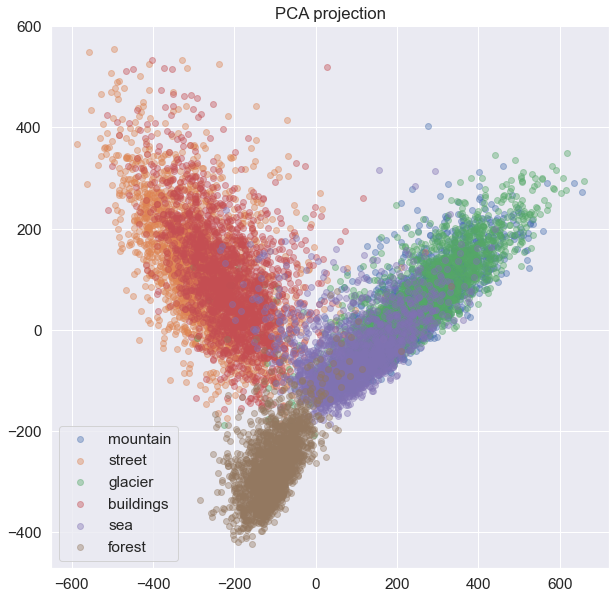

In [37]:
# plotting the pca

plt.subplots(figsize = (10,10))

for i, class_name in enumerate(classes):
    plt.scatter(C0[train_labels == i][:2000], C1[train_labels == i][:2000], label = class_name, alpha = 0.4)
    
plt.legend()
plt.title("PCA projection")
plt.show()

We see a significant overlap between street and buildings. Thinking about this a little more, a lot of the ictures that have streets with building and vice-versa. Hence, it is understandable to make that error. Likewise a good amount of overlap between glacier, sea and mountains is also observed. 



### Adding more layers to VGG16 model

Training a simple neural network on top of the features extracted from the VGG16 model


In [38]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size = 128, epochs = 15,
                     validation_split = 0.2)

Epoch 1/15
88/88 [==============================] - 1s 7ms/step - loss: 1.1462 - accuracy: 0.7986 - val_loss: 0.5226 - val_accuracy: 0.8486
Epoch 2/15
88/88 [==============================] - 1s 6ms/step - loss: 0.2651 - accuracy: 0.9058 - val_loss: 0.5059 - val_accuracy: 0.8618
Epoch 3/15
88/88 [==============================] - 1s 6ms/step - loss: 0.1494 - accuracy: 0.9461 - val_loss: 0.5283 - val_accuracy: 0.8707
Epoch 4/15
88/88 [==============================] - 1s 6ms/step - loss: 0.0946 - accuracy: 0.9672 - val_loss: 0.5300 - val_accuracy: 0.8728
Epoch 5/15
88/88 [==============================] - 1s 6ms/step - loss: 0.0599 - accuracy: 0.9795 - val_loss: 0.5687 - val_accuracy: 0.8771
Epoch 6/15
88/88 [==============================] - 1s 6ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.6256 - val_accuracy: 0.8767
Epoch 7/15
88/88 [==============================] - 1s 6ms/step - loss: 0.0262 - accuracy: 0.9928 - val_loss: 0.6416 - val_accuracy: 0.8750
Epoch 8/15
88/88 [==

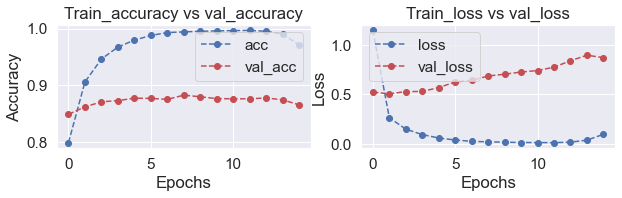

In [39]:
plot_accuracy(history2)

Comparing the accuracies of this model with the simple Conv net developed above we see the accuracy of the training set to be 0.99. What's worth noticing that the accuracy of the validation set has imporved considerably over the Convolutinal Neural Net - 0.49 vs 0.87

In [40]:
# checking performance on test data set
test_performance = model2.evaluate(test_features, test_labels)

94/94 [==============================] - 0s 967us/step - loss: 0.8481 - accuracy: 0.8657


In [41]:
train_features[1].shape

(4, 4, 512)

In [42]:
train_images[1].shape

(150, 150, 3)

In [43]:
train_features[1]

array([[[ 0.      , 11.451669,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[ 0.      ,  6.577774,  0.      , ...,  0.      , 50.423634,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      , 19.133194,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[ 0.      ,  0.      ,  0.      , ...,  0.      , 51.81482 ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
      

### Fine tuning the VGG16 model

In [53]:
model3 = VGG16(weights = 'imagenet', include_top = False)
model3 = Model(inputs = model3.inputs, outputs = model3.layers[-5].output)

In [54]:
tr_features = model3.predict(train_images)
te_features = model3.predict(test_images)

In [55]:
# Adding more layers to the fine tuned VGG16 model. 
#The ouput features obtained in the previous step will be fed into the additional layers

from keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten

model4 = VGG16(weights = 'imagenet', include_top = False)

input_shape = model4.layers[-4].get_input_shape_at(0) # get the input shape of the desired layer

# adding a new tensor to feed the desired layer
layer_input = Input(shape = (9, 9, 512))

# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input

for layer in model4.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3,3), activation = 'relu')(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Flatten()(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(6, activation = 'softmax')(x)

updated_model = Model(layer_input, x)


In [56]:
updated_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [57]:
updated_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0   

In [58]:
history_updated = updated_model.fit(tr_features, train_labels, 
                                   batch_size = 128, epochs = 4, 
                                   validation_split = 0.2)

Epoch 1/4
88/88 [==============================] - 315s 4s/step - loss: 3.1376 - accuracy: 0.1806 - val_loss: 1.7914 - val_accuracy: 0.1838
Epoch 2/4
88/88 [==============================] - 327s 4s/step - loss: 1.7917 - accuracy: 0.1777 - val_loss: 1.7908 - val_accuracy: 0.1838
Epoch 3/4
88/88 [==============================] - 328s 4s/step - loss: 1.7912 - accuracy: 0.1778 - val_loss: 1.7905 - val_accuracy: 0.1838
Epoch 4/4
88/88 [==============================] - 326s 4s/step - loss: 1.7912 - accuracy: 0.1778 - val_loss: 1.7903 - val_accuracy: 0.1838


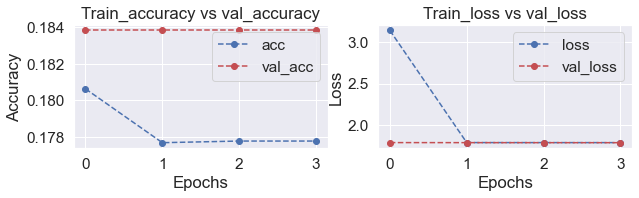

In [59]:
plot_accuracy(history_updated)

In [61]:
predictions = updated_model.predict(te_features)

In [63]:
from sklearn.metrics import accuracy_score
predicted_labels = np.argmax(predictions, axis = 1)
print("Accuracy = {}".format(accuracy_score(test_labels, predicted_labels)))


Accuracy = 0.175


In [64]:
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.17      1.00      0.30       525
           1       0.00      0.00      0.00       501
           2       0.00      0.00      0.00       553
           3       0.00      0.00      0.00       437
           4       0.00      0.00      0.00       510
           5       0.00      0.00      0.00       474

    accuracy                           0.17      3000
   macro avg       0.03      0.17      0.05      3000
weighted avg       0.03      0.17      0.05      3000



/Users/srijagannathan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srijagannathan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srijagannathan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

We see that the fine tuned model that is adding more layers to the original VGG16 model seems to perform worse that the models we created before. Reasons for these can include : 
 - Lack of preprocessing the data in terms of rotating the images, scaling the images.
 - Not training the model on sufficient dense models. The pretrained set up needs a lot more information to train the model on. 